### sklearn.ensemble.RandomForestClassifier
- class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))

In [1]:
import pandas as pd
train_df = pd.read_csv('./datasets/human_train.csv')
test_df = pd.read_csv('./datasets/human_test.csv')

In [ ]:
train_df['Activity'].unique()

In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df['Labels'] = encoder.fit_transform(train_df['Activity'])

In [3]:
train_df = train_df.loc[:, ~train_df.columns.duplicated(keep='first')]

In [4]:
import numpy as np

X_train = train_df.drop(['Activity', 'Labels','subject'], axis=1)
y_train = train_df['Labels']

X_test = test_df.drop(['Activity', 'subject'] , axis=1)
y_test = LabelEncoder().fit_transform(test_df["Activity"])

In [5]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
ftr_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)

In [15]:
sorted_feature_importances = ftr_importances.sort_values(ascending=False)

In [30]:
data = sorted_feature_importances[:20]
df = pd.DataFrame(data, columns=['feature importances'])

In [31]:
df

,feature importances
tGravityAcc-mean()-X,0.036380
tGravityAcc-max()-X,0.030331
"angle(X,gravityMean)",0.029676
tGravityAcc-mean()-Y,0.025355
tGravityAcc-energy()-X,0.024963
"angle(Y,gravityMean)",0.024415
tGravityAcc-min()-X,0.022650
tGravityAcc-max()-Y,0.021705
tGravityAcc-min()-Y,0.021635
tGravityAcc-energy()-Y,0.017179


In [23]:
data.values

array([0.0363802 , 0.03033129, 0.02967647, 0.02535491, 0.024963  ,
       0.02441495, 0.02264967, 0.02170463, 0.02163531, 0.01717914,
       0.01348176, 0.0124398 , 0.0124364 , 0.01190088, 0.01135058,
       0.01015897, 0.01014171, 0.0101222 , 0.00991957, 0.00973448])

<Axes: >

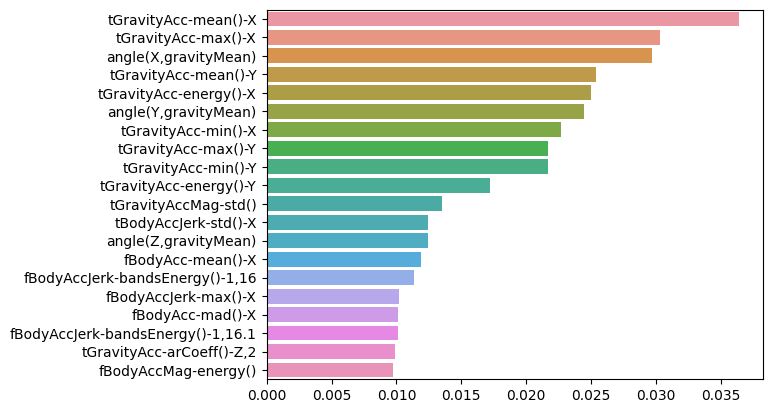

In [14]:
import seaborn as sns
sns.barplot(x=ftr_importances.sort_values(ascending=False)[:20], y=ftr_importances.sort_values(ascending=False)[:20].index)

<Axes: xlabel='feature importances'>

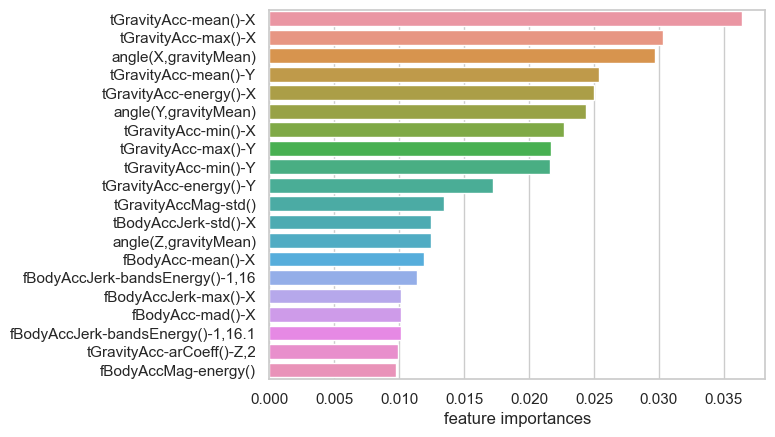

In [36]:
sns.set_theme(style="whitegrid") ## figure, axes 스타일
sns.barplot(x='feature importances', y=df.index, data=df, orient='h')

In [37]:
from sklearn.model_selection import GridSearchCV

params={
    "max_depth":[8,12,16,20],
    "min_samples_split" : [16,24]
}
X_train_feature_importances = X_train[df.index]
grid_cv = GridSearchCV(rfc , param_grid=params , cv=5 , verbose=1)
grid_cv.fit(X_train_feature_importances , y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             verbose=1)

In [40]:
best_rfc = grid_cv.best_estimator_

In [43]:
pred = best_rfc.predict(X_test[df.index])

In [44]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
accuracy_score(y_test, pred)

0.8018323719036308